# Genel Bakış

## Başlıklar

- [Kütüphaneler](#section-one)
- [Veri Setlerinin Oluşturuluşu](#section-two)
  - [Veri Manipülasyonu](#subsection-one)
  - [Veri Setlerinin Görselleştirilmesi](#subsection-two)
- [İstatistiksel Analizler](#section-three)
  - [Betimsel İstatistikler](#subsection-three)
  - [Betimsel İstatistikler İçin Fonksiyonlar (Kendi Fonksiyonlarım)](#subsection-four)
  - [Kendi Fonksiyonlarımla Betimsel İstatistikler](#subsection-five)
  - [Görsel Analiz](#subsection-six)
  

# Ödev

<a id="section-one"></a>
## **Kütüphaneler**

In [1]:
import numpy as np # Dizi ve matrislerle işlemler yapmak için kullanılan kütüphane
import pandas as pd # Veri işlemesi ve manipülasyonu için kullanılan kütüphane
import seaborn as sns # Veri görselleştirme kütüphanesi
import matplotlib.pyplot as plt # Veri görselleştirme kütüphanesi

<a id="section-two"></a>
## **Veri Setlerinin Oluşturuluşu**


<a id="subsection-one"></a>
### Veri Manipülasyonu

In [2]:
X = np.random.normal(0,20,200) # Ortalaması 0, Standart Dağılımı 20 olan 200 gözlemlik 'X' veri setini oluştur
X = pd.DataFrame(X) # Bu veri setini Pandas Dataframe'ine dönüştür
X['X ~ N (Ortalama = 0, Standart Sapma = 20)'] = X # Dataframe'in kolon ismini değiştir
X = X.drop(0,axis=1) # Dataframe'in kolon ismini değiştir
X.head() # Dataframe'in ilk 5 gözlemini göster

,"X ~ N (Ortalama = 0, Standart Sapma = 20)"
0,39.454214
1,-21.065344
2,-43.762443
3,-20.691035
4,-15.106943


In [3]:
Y = np.random.binomial(50,0.8,200) # 50 deney ve 80% gerçekleşme olasılığıyla 200 gözlemlik bir 'Y' veri seti oluştur
Y = pd.DataFrame(Y) # Bu veri setini Pandas Dataframe'ine dönüştür
Y['Y ~ Binominal (Y = 50, P = 80%)'] = Y # Dataframe'in kolon ismini değiştir
Y = Y.drop(0,axis=1) # Dataframe'in kolon ismini değiştir
Y.head() # Dataframe'in ilk 5 gözlemini göster

,"Y ~ Binominal (Y = 50, P = 80%)"
0,46
1,41
2,44
3,44
4,37


<a id="subsection-two"></a>
### Veri Setlerinin Görselleştirilmesi

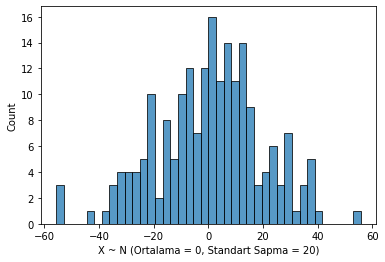

In [4]:
sns.histplot(data = X, x='X ~ N (Ortalama = 0, Standart Sapma = 20)',bins=40) # X veri setinin frekans sayısına göre histogram grafiği

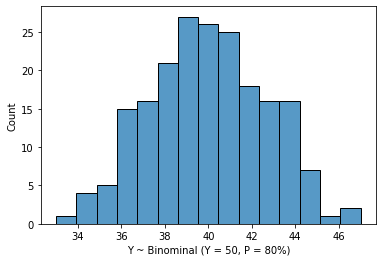

In [5]:
sns.histplot(data = Y, x='Y ~ Binominal (Y = 50, P = 80%)',bins=15) # Y veri setinin frekans sayısına göre histogram grafiği

<a id="section-three"></a>
## **İstatistiksel Analizler**

<a id="subsection-three"></a>
### Betimsel İstatistikler

In [6]:
XY = pd.DataFrame() # Yeni dataframe oluştur
XY['X'] = X # Yeni dataframe'e X kolonu oluştur ve X veri setindeki değerleri yerleştir
XY['Y'] = Y # Yeni dataframe'e Y kolonu oluştur ve Y veri setindeki değerleri yerleştir
XY.head() # XY Dataframe'inin ilk 5 gözlemini göster

,X,Y
0,39.454214,46
1,-21.065344,41
2,-43.762443,44
3,-20.691035,44
4,-15.106943,37


In [7]:
XY.describe().T # X ve Y veri setlerinin temel merkezi eğilim ve dağılım ölçüleri

,count,mean,std,min,25%,50%,75%,max
X,200.0,0.46209,19.388471,-55.659581,-10.718818,1.574507,12.297262,55.697834
Y,200.0,39.97500,2.852201,33.000000,38.000000,40.000000,42.000000,47.000000


In [8]:
XY.corr() # X ve Y veri setlerinin Korelasyon çarpım tablosu

,X,Y
X,1.000000,0.069804
Y,0.069804,1.000000


<a id="subsection-four"></a>
### Betimsel İstatistikler İçin Fonksiyonlar (Kendi Fonksiyonlarım)

In [9]:
my_mean = lambda dataset: sum(dataset)/len(dataset) # Kendi ortalama fonksiyonum
my_variance = lambda dataset: sum( (xi-(my_mean(dataset)))**2 for xi in dataset) / (len(dataset) -1)# Kendi varyans fonksiyonum
my_variance_p = lambda dataset: sum( (xi-(my_mean(dataset)))**2 for xi in dataset) / len(dataset)# Kendi popülasyon varyans fonksiyonum
my_std = lambda dataset: np.sqrt(my_variance(dataset=dataset)) # Kendi standart sapma fonksiyonum
my_std_p = lambda dataset: np.sqrt(my_variance_p(dataset=dataset)) # Kendi popülasyon standart sapma fonksiyonum
my_var_coeff = lambda dataset: (my_std(dataset=dataset) / my_mean(dataset=dataset))*100 # Kendi varyasyon katsayısı fonksiyonum
my_covar = lambda datasetX, datasetY: sum((datasetX-np.mean(datasetX))*(datasetY-np.mean(datasetY))) / (len(datasetY)-1) # Kendi kovaryans bulan fonksiyonum
my_coeff_corr = lambda datasetX, datasetY: my_covar(datasetX,datasetY)/np.sqrt(my_variance(datasetY)*my_variance(datasetX)) # Kendi korelasyon katsayısı bulan fonksiyonum
my_coeff_reg = lambda datasetX, datasetY: my_covar(datasetX,datasetY)/my_variance(datasetX) # Kendi regresyon katsayısı veren fonksiyonum

sample = [1,2,3,4,5] # Basit seri oluştur
sample2 = [-1,-2,-3,-4,-5] # Basit seri oluştur

print(f'X = {sample} ve Y = {sample2} serilerinin/serisinin betimsel istatistik değerleri;', '\n') # İçerisinde değişken barındıran bir metin çıktısı ver
print('Ortalama X:',my_mean(sample), '\n') # Ortalama çıktısı ver
print('Varyans X:',my_variance(sample), '\n') # Varyans çıktısı ver
print('Standart Sapma X:',my_std(sample), '\n') # Standart Sapma çıktısı ver
print('Coefficient Variance X:',my_var_coeff(sample),'%', '\n') # Varyasyon katsayısı çıktısı ver
print('Covaryans XY:',my_covar(sample,sample2), '\n') # Covaryans çıktısı ver
print('Coefficient Correlation XX:',my_coeff_corr(sample,sample), '\n') # Korelasyon katsayısı ver
print('Coefficient Correlation XY:',my_coeff_corr(sample,sample2), '\n') # Korelasyon katsayısı ver
print('Coefficient Regression XX:',my_coeff_reg(sample,sample), '\n') # Regresyon katsayısı ver
print('Coefficient Regression XY:',my_coeff_reg(sample,sample2), '\n') # Regresyon katsayısı ver

X = [1, 2, 3, 4, 5] ve Y = [-1, -2, -3, -4, -5] serilerinin/serisinin betimsel istatistik değerleri; 

Ortalama X: 3.0 

Varyans X: 2.5 

Standart Sapma X: 1.5811388300841898 

Coefficient Variance X: 52.70462766947299 % 

Covaryans XY: -2.5 

Coefficient Correlation XX: 1.0 

Coefficient Correlation XY: -1.0 

Coefficient Regression XX: 1.0 

Coefficient Regression XY: -1.0 



<a id="subsection-five"></a>
### Kendi Fonksiyonlarımla Betimsel İstatistikler

In [10]:
np_XY = np.array(XY) # XY setini Pandas Dataframe'inden Numpy Serisine çevir
np_X = np.array(X) # X setini Pandas Dataframe'inden Numpy Serisine çevir
np_Y = np.array(Y) # Y setini Pandas Dataframe'inden Numpy Serisine çevir

In [11]:
print('X Veri setinin Ortalaması :',my_mean(np_X), '\n')
print('Y Veri setinin Ortalaması :',my_mean(np_Y), '\n')
print('X Veri setinin Varyansı :',my_variance(np_X), '\n')
print('Y Veri setinin Varyansı :',my_variance(np_Y), '\n')
print('X Veri setinin Standart Sapması :',my_std(np_X), '\n')
print('Y Veri setinin Standart Sapması :',my_std(np_Y), '\n')
print('X Veri setinin Varyasyon Katsayısı :', my_var_coeff(np_X)/100, '\n')
print('Y Veri setinin Varyasyon Katsayısı :', my_var_coeff(np_Y)/100, '\n')
print('X ve Y Veri setlerinin Kovaryansları :', my_covar(np_X,np_Y), '\n')
print('X ve Y Veri setlerinin Korelasyon Katsayıları :', my_coeff_corr(np_X,np_Y), '\n')
print('X ve X Veri setlerinin Korelasyon Katsayıları :', my_coeff_corr(np_X,np_X), '\n')
print('Y ve Y Veri setlerinin Korelasyon Katsayıları :', my_coeff_corr(np_Y,np_Y), '\n')
print('X ve Y Veri setlerinin Regresyon Katsayıları :', my_coeff_reg(np_X,np_Y), '\n')
print('X ve X Veri setlerinin Regresyon Katsayıları :', my_coeff_reg(np_X,np_X), '\n')
print('Y ve Y Veri setlerinin Regresyon Katsayıları :', my_coeff_reg(np_Y,np_Y), '\n')

X Veri setinin Ortalaması : [0.46208973] 

Y Veri setinin Ortalaması : [39.975] 

X Veri setinin Varyansı : [375.91281238] 

Y Veri setinin Varyansı : [8.13505025] 

X Veri setinin Standart Sapması : [19.38847112] 

Y Veri setinin Standart Sapması : [2.85220095] 

X Veri setinin Varyasyon Katsayısı : [41.95823885] 

Y Veri setinin Varyasyon Katsayısı : [0.07134962] 

X ve Y Veri setlerinin Kovaryansları : [3.86012655] 

X ve Y Veri setlerinin Korelasyon Katsayıları : [0.06980361] 

X ve X Veri setlerinin Korelasyon Katsayıları : [1.] 

Y ve Y Veri setlerinin Korelasyon Katsayıları : [1.] 

X ve Y Veri setlerinin Regresyon Katsayıları : [0.01026868] 

X ve X Veri setlerinin Regresyon Katsayıları : [1.] 

Y ve Y Veri setlerinin Regresyon Katsayıları : [1.] 



<a id="subsection-six"></a>
### Görsel Analiz

[Text(0.5, 1.0, 'Korelasyon Heatmap')]

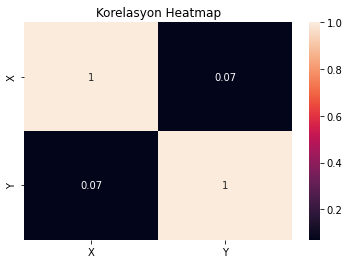

In [12]:
sns.heatmap(XY.corr(), annot= True).set(title='Korelasyon Heatmap') # Veri setlerinin korelasyon ısı haritaları (bağımsızlar)

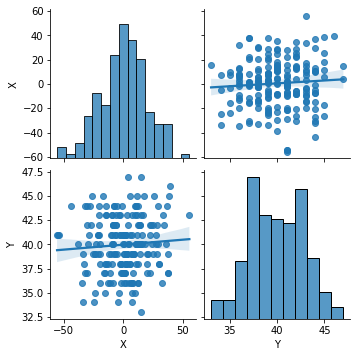

In [13]:
sns.pairplot(XY,kind='reg') # Veri setlerinin regresyon dağılım ve lineer grafikleri (dağılımın ortalamasından çıkan çizginin tanjantı 0'a yakın olduğu için bağımsızdırlar) 